In [1]:
##############################################################################
## Open CV sample using colorspace transformation: 
## http://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
## http://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
##############################################################################


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


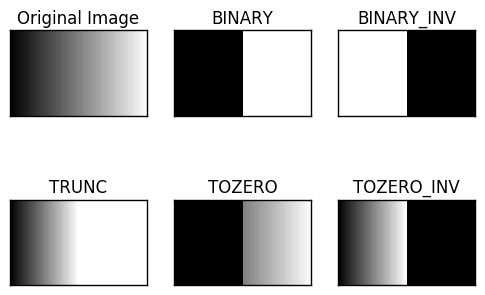

In [4]:
img = cv2.imread('gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

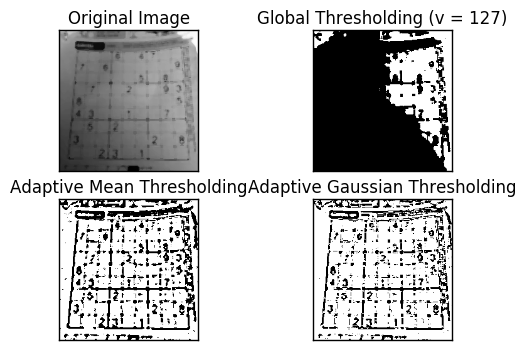

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('dave.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [6]:
import os
import scipy.misc 
ip_files = []
train_files = os.listdir('E:\\SigTuple_Hack\\Train_Data')
ip_files += [f for f in train_files if f.endswith('.jpg') and 'mask' not in f]
#ip_files += [f for f in train_files if f.endswith('.jpg') ]
#ip_files

In [47]:
img_file = 'E:\\SigTuple_Hack\\Train_Data\\' + ip_files[0]

img = cv2.imread(img_file,0)
img = cv2.medianBlur(img,5)


In [48]:

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)


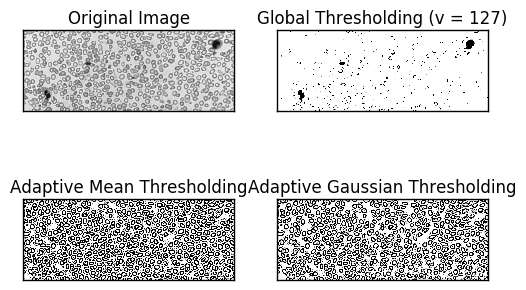

In [49]:
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

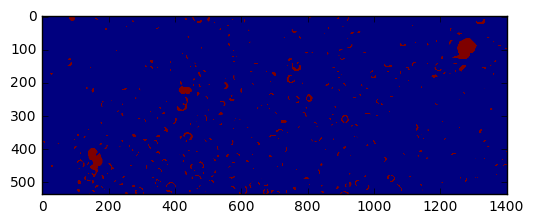

In [29]:
res = cv2.bitwise_not(th1)
plt.imshow(res)

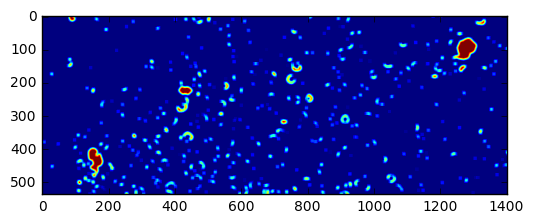

In [37]:
blur = cv2.blur(res, (10,10))
plt.imshow(blur)

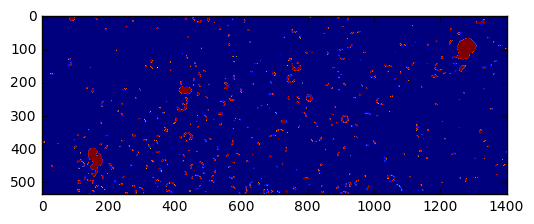

In [43]:
blur = cv2.GaussianBlur(res,(9,9),0.5)
plt.imshow(blur)

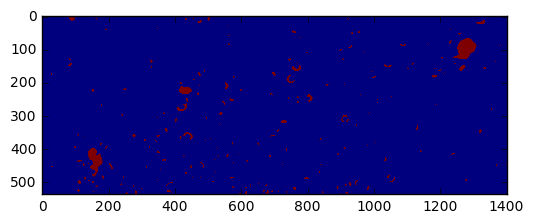

In [54]:
median = cv2.medianBlur(res,7)
plt.imshow(median)

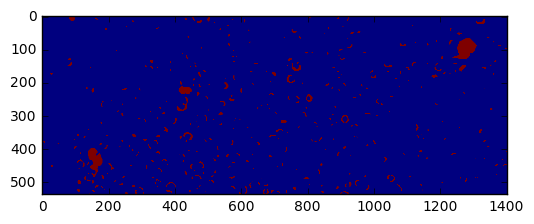

In [56]:
blur = cv2.bilateralFilter(res,5,75,75)
plt.imshow(blur)

In [23]:
import os
import scipy.misc 
ip_files = []
train_files = os.listdir('E:\\SigTuple_Hack\\Test_Data')
ip_files += [f for f in train_files if f.endswith('.jpg') and 'mask' not in f]
#ip_files += [f for f in train_files if f.endswith('.jpg') ]
#ip_files

for _file in ip_files:
    img_file = 'E:\\SigTuple_Hack\\Test_Data\\' + _file
    mask_file = 'E:\\SigTuple_Hack\\Test_Data\\Mask\\' + _file[:-4] + '-mask.jpg'
    

    img = cv2.imread(img_file,0)
    img = cv2.medianBlur(img,5)

    ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_not(th1)
    # save the mask
    scipy.misc.imsave(mask_file, res)